## Default of Credit Card Clients

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
address = '/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv'

In [3]:
df_original = pd.read_csv(address)

In [4]:
print(df_original.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [5]:
df_original =df_original.rename({'PAY_0' : 'PAY_1'},axis=1)

In [6]:
df = df_original.copy()

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

There is no missing data

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## stratifiedshuffle on SEX and default

In [9]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index , test_index in split.split(df,df.iloc[:,[2,-1]]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]
    

In [10]:
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


![title](img/1129/NT_Dollar.png)

LIMIT_BAL = Balance limit

SEX = 1 = male ; 2= femate

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Marital status (1 = married; 2 = single; 3 = others).

Age 

X6 - X11: History of past payment X6 being most recent

-2 inactive account ; -1 paid duly ; 0 = paid minimal monthly payment ; n = delayed for n month 0<n<10


In [11]:
df = df_train

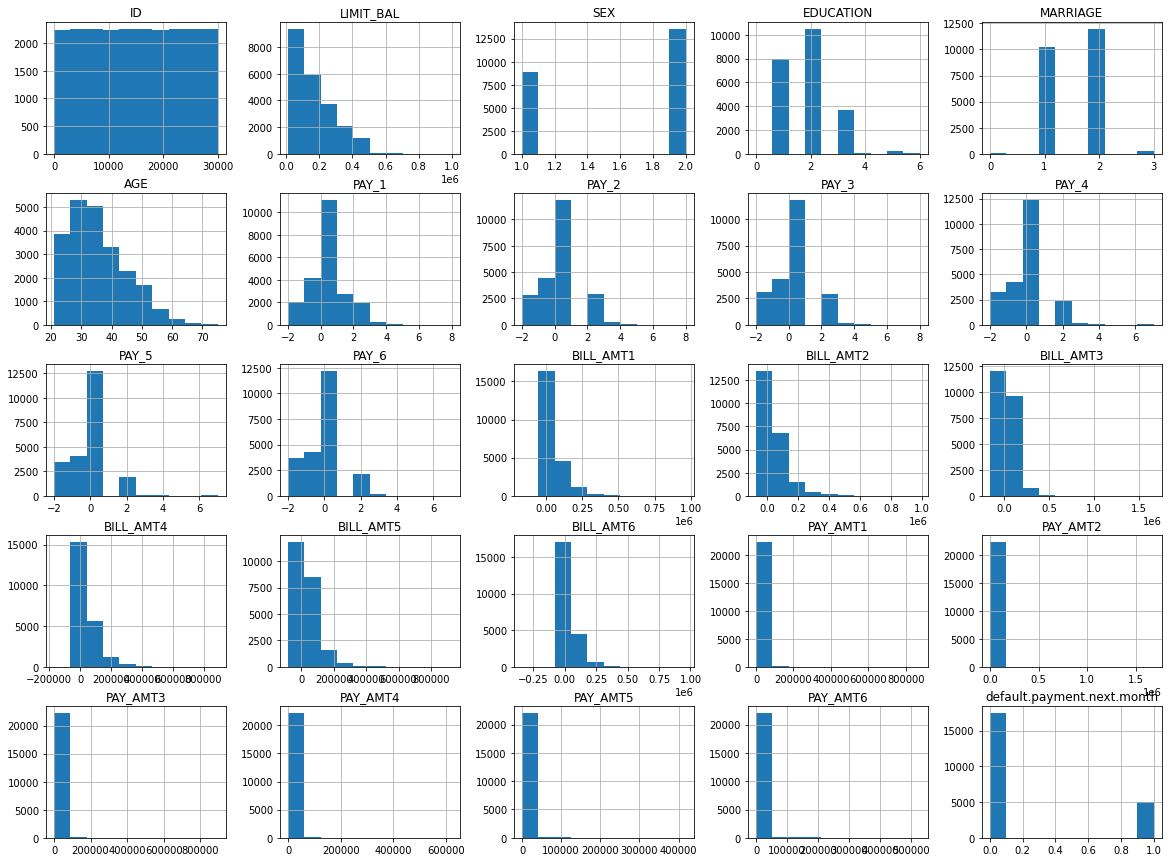

In [12]:
import matplotlib.pyplot as plt
df.hist(figsize= (20,15))
plt.show()

In [13]:
def log_pre (x):
    if abs(x)<5:
        return 0
    return np.log(abs(x))*x/abs(x)
def log_pre_col (column):
    return column.map(lambda x:log_pre(x))

In [14]:
df_log =df.iloc[:,12:-1].apply(log_pre_col,axis=0) #apply(function,axis=)

In [15]:
df_log.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,8.963948,8.756074,8.631158,8.473952,8.314486,8.081983,6.634320,6.564066,6.291826,6.078322,6.017167,5.941555
std,3.541697,3.789721,3.879237,3.968312,4.024370,4.213010,3.250165,3.282292,3.357053,3.400847,3.455247,3.525089
min,-12.017210,-11.153060,-11.965681,-12.043554,-11.306319,-12.735533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.190632,8.039157,7.928046,7.782807,7.511935,7.135488,6.907755,6.745236,5.981414,5.703782,5.483757,4.932669
50%,10.033528,9.985597,9.916428,9.861337,9.811564,9.754320,7.650169,7.606387,7.509335,7.313220,7.313220,7.313220
75%,11.113757,11.061178,11.001721,10.907991,10.821617,10.804375,8.517793,8.517193,8.419250,8.295611,8.294799,8.294050
max,13.779377,13.799311,14.324788,13.700757,13.739893,13.776420,13.680323,14.336836,13.705740,13.339086,12.943213,13.178112


In [16]:
df.iloc[:,12:-1].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000
mean,51245.067778,49206.147733,4.701756e+04,43418.400756,40429.360489,38946.791822,5650.333644,5.961813e+03,5315.743644,4881.652578,4794.299200,5260.496311
std,73507.326943,71120.080694,6.945343e+04,64511.798629,60983.707777,59701.813056,16688.006347,2.448806e+04,18169.839098,16304.685745,15238.981992,18312.417605
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3607.000000,3100.000000,2.774000e+03,2399.000000,1829.750000,1255.750000,1000.000000,8.500000e+02,396.000000,300.000000,240.750000,138.750000
50%,22777.500000,21711.500000,2.026050e+04,19174.500000,18243.500000,17228.500000,2101.000000,2.011000e+03,1825.000000,1500.000000,1500.000000,1500.000000
75%,67087.750000,63651.500000,5.997725e+04,54611.000000,50092.000000,49235.750000,5003.000000,5.000000e+03,4533.500000,4006.250000,4003.000000,4000.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,528666.000000


In [17]:
df_log

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
20349,11.277203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6983,5.739793,6.721426,5.416100,0.000000,0.000000,0.000000,6.723832,5.416100,0.000000,0.000000,0.000000,0.000000
17548,10.835770,10.839189,10.856573,10.855300,9.737492,9.758173,7.600902,7.649693,7.244228,6.396930,6.907755,6.907755
954,7.787382,7.673688,7.678326,7.449498,11.586092,11.589331,7.673688,7.678326,7.449498,11.586092,8.517193,8.160518
12866,9.913190,9.885222,9.752548,9.564723,9.824174,9.538060,7.226936,7.021976,6.131226,8.699515,6.436150,7.600902
...,...,...,...,...,...,...,...,...,...,...,...,...
22066,7.885705,8.258163,9.278840,9.068431,8.370548,7.885705,8.258163,9.278840,6.907755,4.605170,6.907755,7.957177
19277,7.910957,7.425954,6.338594,11.029456,10.973031,10.973031,7.425954,6.338594,11.029456,0.000000,0.000000,8.407378
23975,10.192194,9.239705,9.186867,9.082280,9.148890,8.834046,7.090077,7.600902,7.600902,6.907755,6.907755,6.907755
12381,0.000000,6.461468,10.366026,10.667443,7.809541,7.836765,6.461468,10.366089,10.858730,10.915088,7.836765,8.651199


In [18]:
df.iloc[:,12:-1]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
20349,79000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6983,311.0,830.0,225.0,0.0,0.0,0.0,832.0,225.0,0.0,0.0,0.0,0.0
17548,50806.0,50980.0,51874.0,51808.0,16941.0,17295.0,2000.0,2100.0,1400.0,600.0,1000.0,1000.0
954,2410.0,2151.0,2161.0,1719.0,107591.0,107940.0,2151.0,2161.0,1719.0,107591.0,5000.0,3500.0
12866,20195.0,19638.0,17198.0,14253.0,18475.0,13878.0,1376.0,1121.0,460.0,6000.0,624.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22066,2659.0,3859.0,10709.0,8677.0,4318.0,2659.0,3859.0,10709.0,1000.0,100.0,1000.0,2856.0
19277,2727.0,1679.0,566.0,61664.0,58281.0,58281.0,1679.0,566.0,61664.0,0.0,0.0,4480.0
23975,26694.0,10298.0,9768.0,8798.0,9404.0,6864.0,1200.0,2000.0,2000.0,1000.0,1000.0,1000.0
12381,0.0,640.0,31762.0,42935.0,2464.0,2532.0,640.0,31764.0,51986.0,55000.0,2532.0,5717.0


In [19]:
new_Series = df.BILL_AMT1.map(lambda p:log_pre(p))


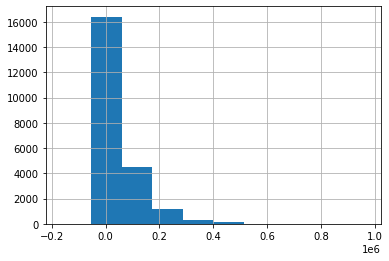

In [20]:
df.BILL_AMT1.hist()
plt.show()

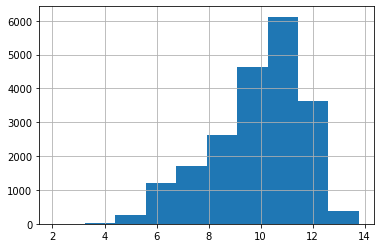

In [21]:
new_Series.loc[new_Series>0].hist()
plt.show()

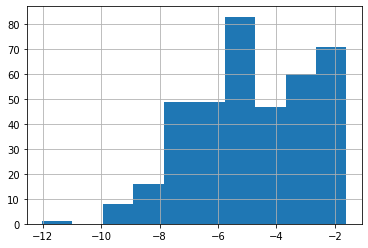

In [22]:
new_Series.loc[new_Series<0].hist()
plt.show()

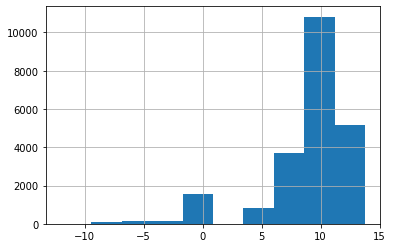

In [23]:
new_Series.hist()
plt.show()

In [24]:
defaults =df.loc[df.iloc[:,-1]==1]

In [25]:
defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
17548,17549,60000.0,2,2,1,48,0,0,0,0,...,51808.0,16941.0,17295.0,2000.0,2100.0,1400.0,600.0,1000.0,1000.0,1
8944,8945,100000.0,2,2,1,42,2,2,0,0,...,97037.0,93480.0,95516.0,13.0,3709.0,4000.0,3500.0,3600.0,3500.0,1
15574,15575,50000.0,1,2,1,51,0,0,0,0,...,32925.0,26640.0,22247.0,2044.0,2000.0,1547.0,2388.0,944.0,1000.0,1
16477,16478,80000.0,2,2,1,54,2,2,2,2,...,51293.0,50170.0,53391.0,2200.0,2100.0,2000.0,0.0,4200.0,2100.0,1
1086,1087,410000.0,2,2,1,41,0,0,0,0,...,368779.0,369358.0,368043.0,14600.0,15500.0,14000.0,13580.0,14000.0,19000.0,1


In [26]:
non_defaults = df.loc[df.iloc[:,-1]==0]

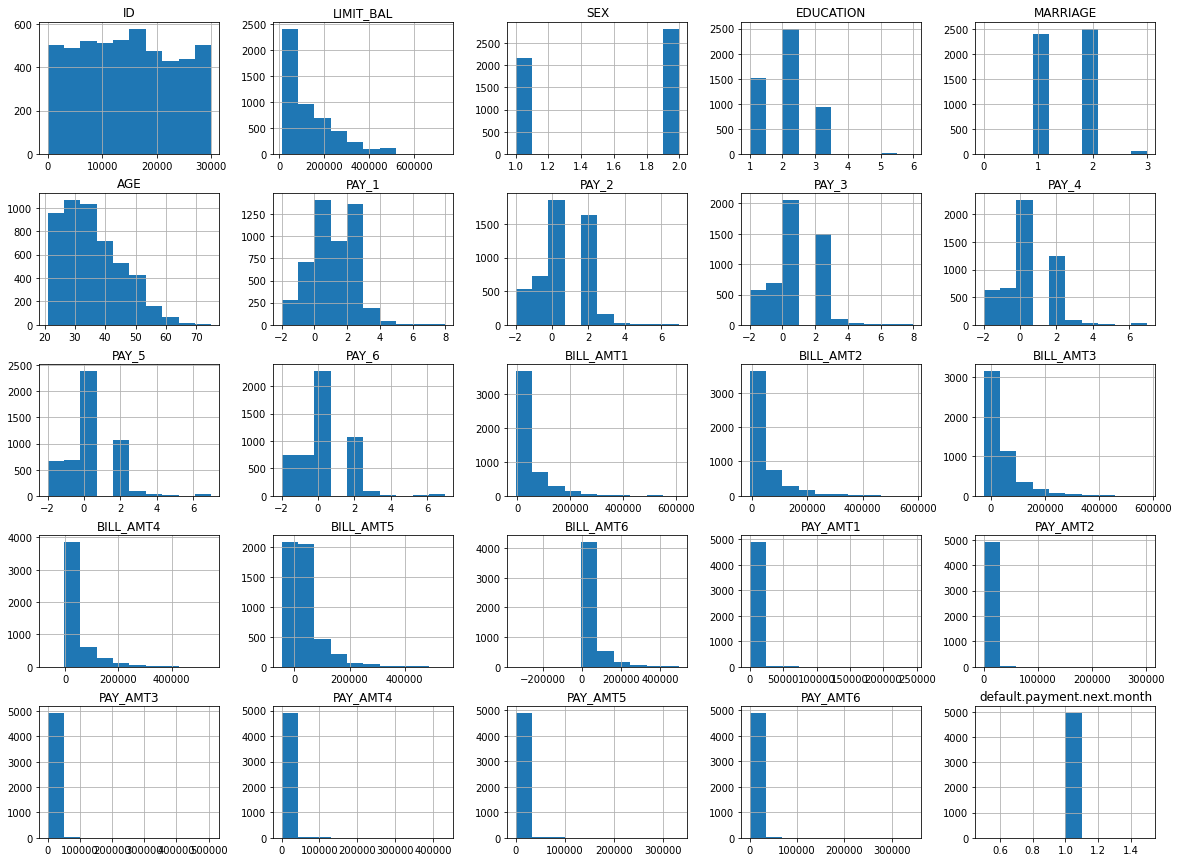

In [27]:
defaults.hist(figsize=(20,15))
plt.show()

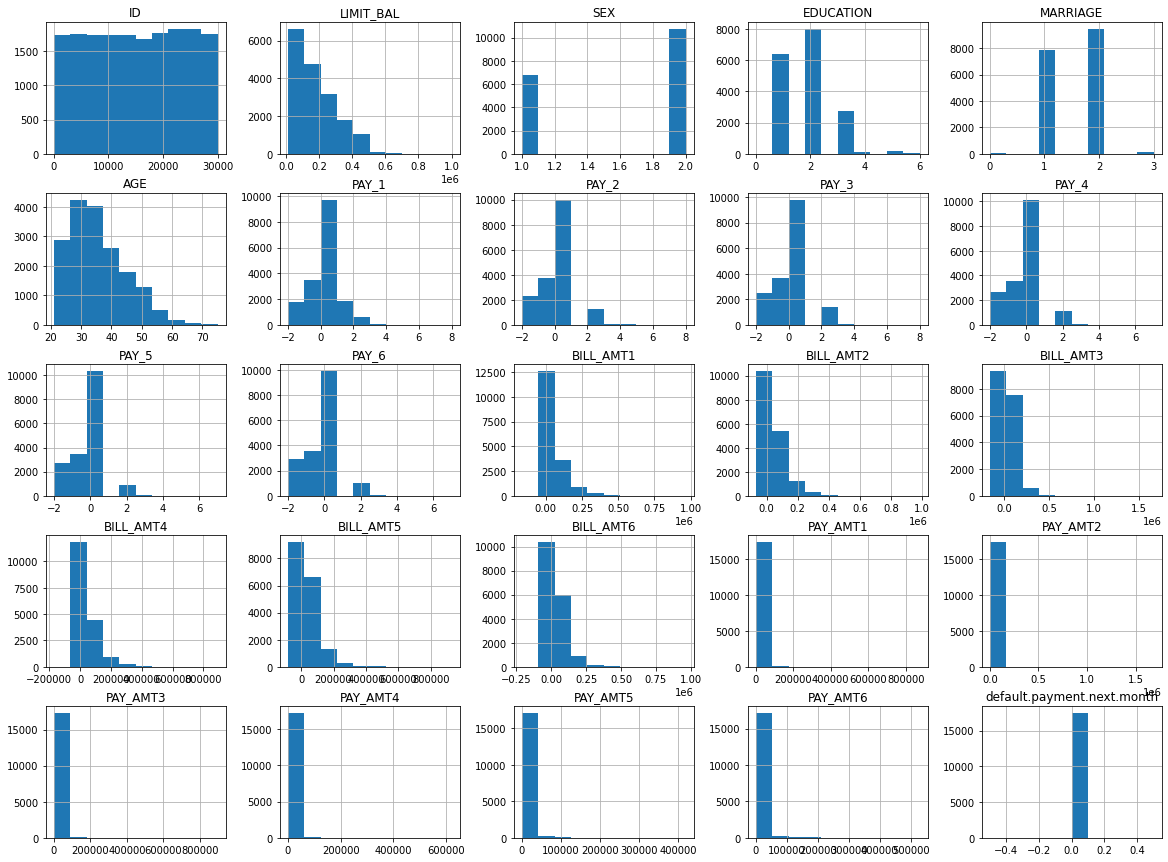

In [28]:
non_defaults.hist(figsize=(20,15))
plt.show()

In [29]:
non_defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
20349,20350,80000.0,1,1,2,25,2,2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6983,6984,300000.0,2,1,1,51,-1,-1,-1,-1,...,0.0,0.0,0.0,832.0,225.0,0.0,0.0,0.0,0.0,0
954,955,110000.0,2,2,1,46,-1,-1,-1,-1,...,1719.0,107591.0,107940.0,2151.0,2161.0,1719.0,107591.0,5000.0,3500.0,0
12866,12867,20000.0,2,2,2,25,0,0,0,0,...,14253.0,18475.0,13878.0,1376.0,1121.0,460.0,6000.0,624.0,2000.0,0
24976,24977,420000.0,1,2,1,38,0,0,0,0,...,311889.0,182087.0,185152.0,10433.0,12000.0,13302.0,7002.0,6500.0,7000.0,0


In [30]:
non_defaults.iloc[0]

ID                            20350.0
LIMIT_BAL                     80000.0
SEX                               1.0
EDUCATION                         1.0
MARRIAGE                          2.0
AGE                              25.0
PAY_1                             2.0
PAY_2                             2.0
PAY_3                            -2.0
PAY_4                            -2.0
PAY_5                            -2.0
PAY_6                            -2.0
BILL_AMT1                     79000.0
BILL_AMT2                         0.0
BILL_AMT3                         0.0
BILL_AMT4                         0.0
BILL_AMT5                         0.0
BILL_AMT6                         0.0
PAY_AMT1                          0.0
PAY_AMT2                          0.0
PAY_AMT3                          0.0
PAY_AMT4                          0.0
PAY_AMT5                          0.0
PAY_AMT6                          0.0
default.payment.next.month        0.0
Name: 20349, dtype: float64

In [31]:
non_defaults.iloc[3]

ID                            12867.0
LIMIT_BAL                     20000.0
SEX                               2.0
EDUCATION                         2.0
MARRIAGE                          2.0
AGE                              25.0
PAY_1                             0.0
PAY_2                             0.0
PAY_3                             0.0
PAY_4                             0.0
PAY_5                             0.0
PAY_6                             0.0
BILL_AMT1                     20195.0
BILL_AMT2                     19638.0
BILL_AMT3                     17198.0
BILL_AMT4                     14253.0
BILL_AMT5                     18475.0
BILL_AMT6                     13878.0
PAY_AMT1                       1376.0
PAY_AMT2                       1121.0
PAY_AMT3                        460.0
PAY_AMT4                       6000.0
PAY_AMT5                        624.0
PAY_AMT6                       2000.0
default.payment.next.month        0.0
Name: 12866, dtype: float64

In [32]:
defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
17548,17549,60000.0,2,2,1,48,0,0,0,0,...,51808.0,16941.0,17295.0,2000.0,2100.0,1400.0,600.0,1000.0,1000.0,1
8944,8945,100000.0,2,2,1,42,2,2,0,0,...,97037.0,93480.0,95516.0,13.0,3709.0,4000.0,3500.0,3600.0,3500.0,1
15574,15575,50000.0,1,2,1,51,0,0,0,0,...,32925.0,26640.0,22247.0,2044.0,2000.0,1547.0,2388.0,944.0,1000.0,1
16477,16478,80000.0,2,2,1,54,2,2,2,2,...,51293.0,50170.0,53391.0,2200.0,2100.0,2000.0,0.0,4200.0,2100.0,1
1086,1087,410000.0,2,2,1,41,0,0,0,0,...,368779.0,369358.0,368043.0,14600.0,15500.0,14000.0,13580.0,14000.0,19000.0,1


In [33]:
non_defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,...,17523.000000,17523.000000,17523.000000,17523.000000,1.752300e+04,17523.000000,17523.000000,17523.000000,17523.000000,17523.0
mean,15089.808423,178151.115677,1.614164,1.842550,1.558637,35.436398,-0.213091,-0.302859,-0.313417,-0.353935,...,43923.812760,40785.055013,39217.018604,6299.058666,6.723048e+03,5857.528049,5353.061519,5209.037608,5807.435656,0.0
std,8679.597414,131940.205300,0.486806,0.808675,0.520907,9.086993,0.943451,1.030239,1.052571,1.009398,...,64740.666982,61018.118159,59904.351331,18230.092160,2.722734e+04,19341.771610,17320.072405,15906.060294,19516.623314,0.0
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,7559.500000,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2462.500000,1944.000000,1261.000000,1188.000000,1.006000e+03,623.500000,390.000000,358.000000,308.000000,0.0
50%,15126.000000,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19194.000000,18183.000000,16876.000000,2481.000000,2.252000e+03,2000.000000,1740.000000,1747.000000,1721.000000,0.0
75%,22637.500000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,56272.000000,51115.500000,49793.500000,5580.500000,5.300000e+03,5000.000000,4600.000000,4521.500000,4586.500000,0.0
max,29997.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,528666.000000,0.0


In [34]:
defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,...,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.000000,4977.0
mean,14738.426964,130230.596745,1.567008,1.898935,1.528833,35.709263,0.669681,0.452481,0.356440,0.249950,...,41638.948362,39177.032751,37995.378541,3366.305405,3281.661242,3408.231465,3221.918023,3334.090014,3334.834639,1.0
std,8560.742005,115396.277193,0.495539,0.730338,0.524732,9.639402,1.391505,1.511279,1.484085,1.493896,...,63673.977820,60851.975696,58979.295762,9068.360592,9577.157046,13066.604819,11921.979562,12505.025362,13047.622956,0.0
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-46627.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7428.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2142.000000,1473.000000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,14586.000000,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,...,19147.000000,18432.000000,18036.000000,1641.000000,1577.000000,1224.000000,1000.000000,1000.000000,1000.000000,1.0
75%,21782.000000,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,...,50036.000000,47835.000000,47398.000000,3466.000000,3309.000000,3000.000000,2850.000000,3000.000000,2959.000000,1.0
max,30000.000000,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,7.000000,...,548020.000000,547880.000000,498316.000000,244500.000000,302000.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


## Histogram with Comparison red=defaults

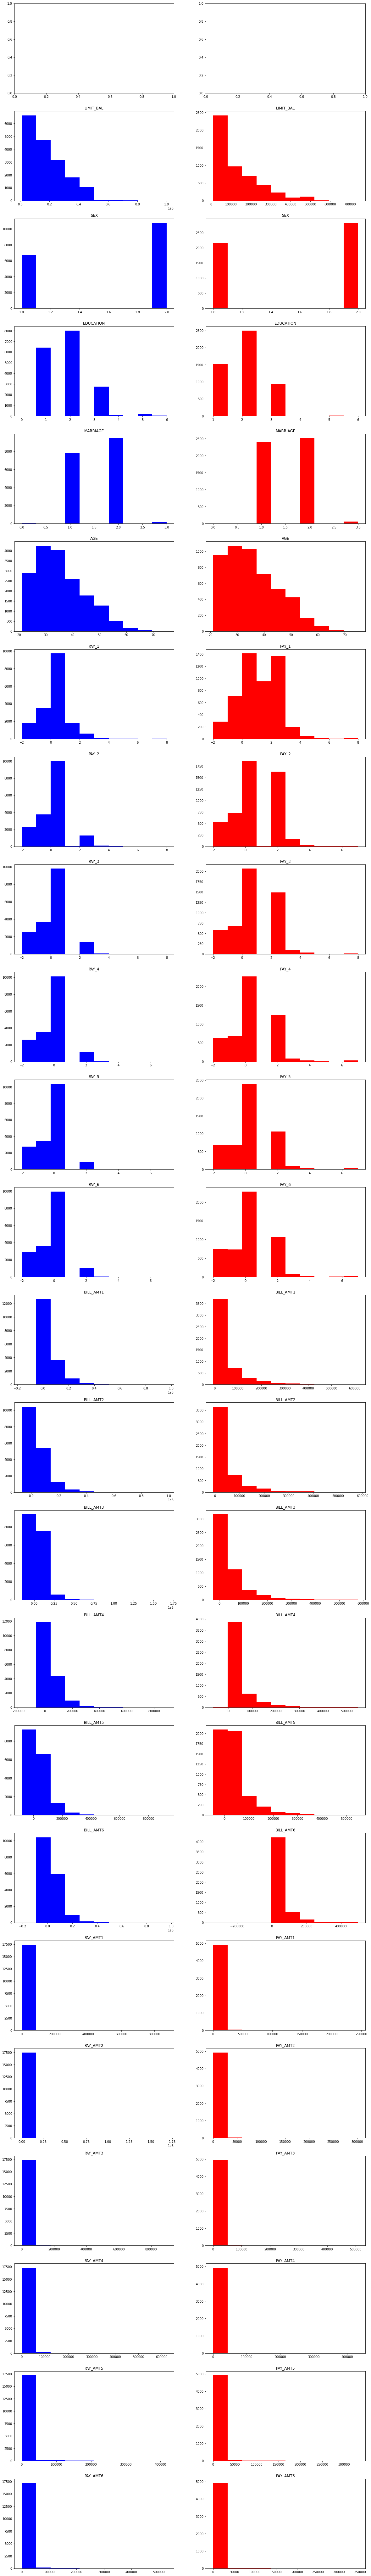

In [35]:
fig, axes = plt.subplots(24,2, num=1, clear=True, figsize=(20,150))

for i in range(1,24):
    axes[i,0].hist(non_defaults.iloc[:,i],color='b')
    axes[i,0].set_title(df.columns[i])

for i in range(1,24):
    axes[i,1].hist(defaults.iloc[:,i],color='r')
    axes[i,1].set_title(df.columns[i])

plt.show()